# 1
Utilize o conjunto de dados [Go To College Dataset](https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset) ou um conjunto de dados de **classificação supervisionada** de sua escolha.

In [4]:
import pandas as pd

path = "/home/levy_silveira/Downloads/Dados/archive/data.csv"
dados = pd.read_csv(path)

dados.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


# 2
Realize uma Análise Exploratória de Dados.

`type_school`, `school_accreditation`, `gender`, `interest` e `residence` passaram por um processo de Label Encoder.

In [32]:
def label_encoder(data, column):
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le.fit(data[column])
    new_column = le.transform(data[column])
    new_column = pd.DataFrame(new_column)
    
    return new_column

col1 = 'type_school'
col2 = 'school_accreditation'
col3 = 'gender'
col4 = 'residence'
col5 = 'interest'
coly = 'will_go_to_college'

c1 = label_encoder(dados, col1)
c2 = label_encoder(dados, col2)
c3 = label_encoder(dados, col3)
c4 = label_encoder(dados, col4)
c5 = label_encoder(dados, col5)

X = dados.drop(columns = [col1, col2, col3, col4, col5,coly])

X[col1] = c1
X[col2] = c2
X[col3] = c3
X[col4] = c4
X[col5] = c5

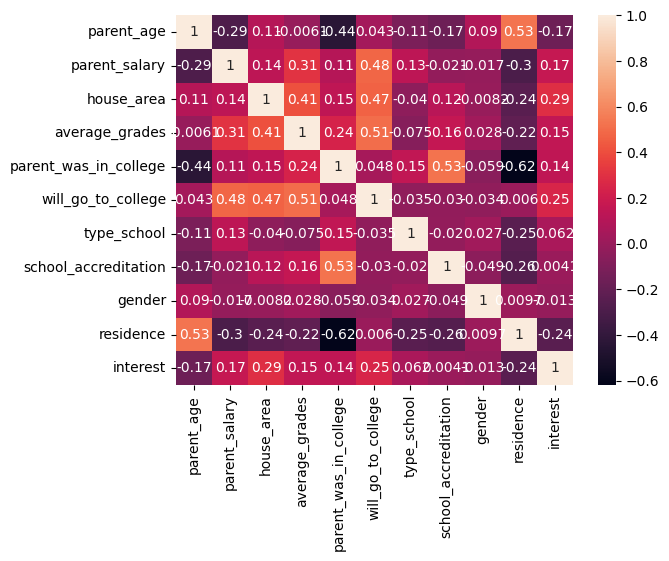

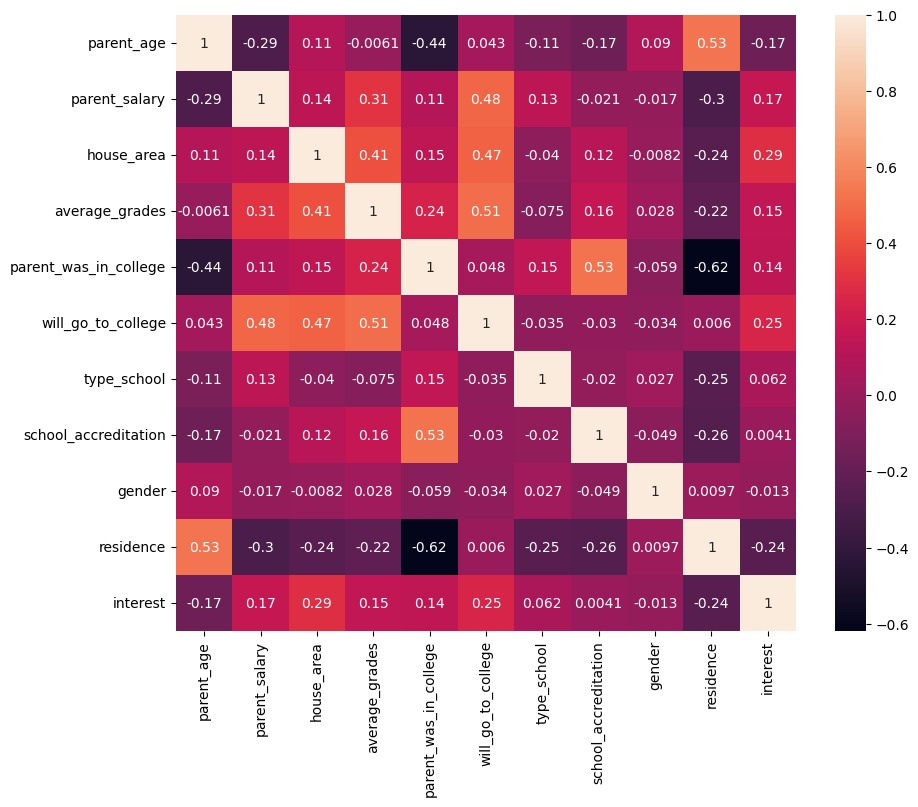

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = dados.drop(columns = [col1, col2, col3, col4, col5])
df[col1] = c1
df[col2] = c2
df[col3] = c3
df[col4] = c4
df[col5] = c5

sns.heatmap(df.corr(), annot=True)

plt.figure(figsize=(10, 8))

# Cria o heatmap
sns.heatmap(df.corr(), annot=True)

# Mostra o gráfico
plt.show()

# 3
Caso algum dado seja categórico, transforme para númerico.

In [36]:
# Isto foi feito no passo 2

# 4
Divida os dados em treino/teste utilizando a técnica hold-out. Escolha uma porcentagem para treino/teste (mais utilizadas: 90/10, 80/20, 75/25, 70/30, 50/50).

In [49]:
y = dados['will_go_to_college']
y = y.replace({True: 1, False: 0})

In [51]:
# NÃO ESTÁ USANDO A TÉCNICA HOLD-OUT

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.1, random_state=42)

# 5

Realize a classificação utilizando o KNN.

In [58]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

num_vizinhos = 11


X_train1 = np.array(X_train1)
X_test1 = np.array(X_test1)
y_train1 = np.array(y_train1)
y_test1 = np.array(y_test1)

KNN = KNeighborsClassifier(n_neighbors=num_vizinhos)

KNN.fit(X_train1, y_train1)
pred = KNN.predict(X_test1)

# 6

Calcule a acurácia, F1-score, recall, precision.

In [60]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

precision = metrics.precision_score(y_test1, pred)
recall = metrics.recall_score(y_test1, pred)
f1_score = metrics.f1_score(y_test1, pred)
acc = accuracy_score(y_test1, pred)

print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)
print("Acc: ", acc)

Precisão: 0.7407407407407407
Recall: 0.7692307692307693
F1-Score: 0.7547169811320754
Acc:  0.74


# 7

Exiba o [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [ ]:
# CODE

# 8

Plot a [matriz de confusão](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay). Outra biblioteca interessante para o plot é a seaborn [exemplo de uso](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea).

In [ ]:
# CODE

# 9

Realize vários experimentos. Modifique a quantidade de vizinhos (parametro n_neighbors), e crie um plot (k vs acurácia).

In [ ]:
# CODE

# 10

Realize vários experimentos. Modifique a quantidade de dados para treino/teste, e crie um plot (%treino vs acurácia).

In [ ]:
# CODE